# SUPPORT VECTOR CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [3]:
X,y

(array([[-1.03844791, -0.74749095],
        [ 0.65855631,  1.36939463],
        [-1.04078209,  1.09186122],
        ...,
        [ 0.86071727,  1.04721209],
        [ 0.2672835 , -0.95834809],
        [ 1.97343697,  0.13460992]]),
 array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 

<AxesSubplot: xlabel='0', ylabel='1'>

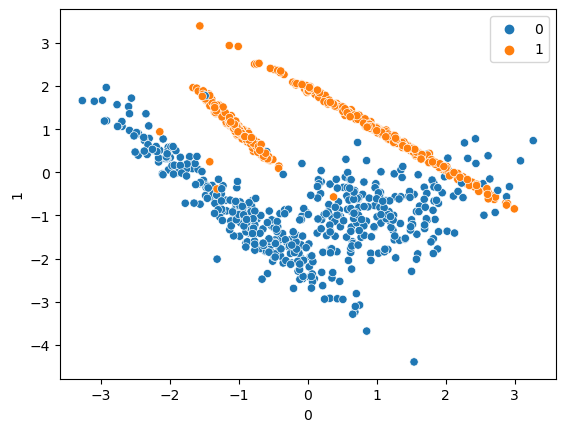

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33,random_state=42)

In [8]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       163
           1       0.89      0.93      0.91       167

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[143  20]
 [ 11 156]]
0.906060606060606


In [32]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
    }
grid=GridSearchCV(svc,param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

In [16]:
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       163
           1       0.88      0.95      0.91       167

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[142  21]
 [  9 158]]
0.9090909090909091


#  support vector regressor

In [19]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

<AxesSubplot: xlabel='0', ylabel='1'>

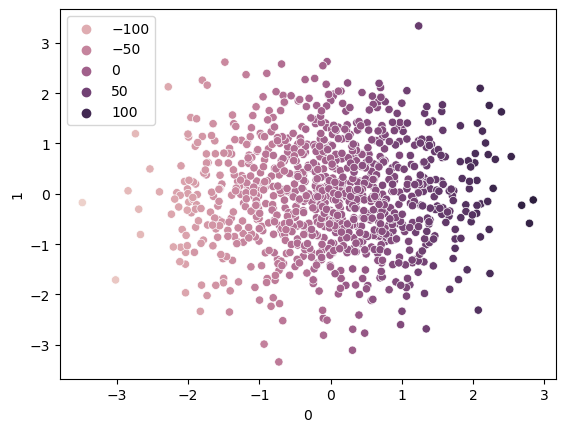

In [21]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,random_state=42)

In [24]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9955633958824475


In [34]:
import warnings 
warnings.filterwarnings('ignore') 

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
    }
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [38]:
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9956063050882997
